In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [20]:
dataset = pd.read_csv('insurance.csv')
dataset.tail()


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [21]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [22]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# exploring more the dataset

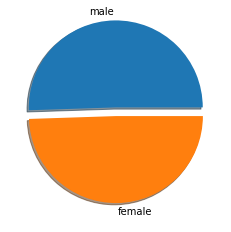

In [24]:
len_sex_male=dataset["sex"][dataset.sex=="male"]
len_sex_female=dataset["sex"][dataset.sex=="female"]
arr=np.array([len(len_sex_male),len(len_sex_female)])
labels=["male","female"]
plt.pie(arr,labels=labels,explode=[0.1,0.0],shadow=True)
plt.show()

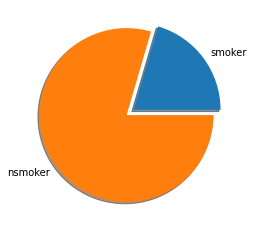

In [25]:
len_smoker=dataset["smoker"][dataset.smoker=="yes"]
len_no_smoker=dataset["smoker"][dataset.smoker=="no"]
arr=np.array([len(len_smoker),len(len_no_smoker)])
labels=["smoker","nsmoker"]
plt.pie(arr,labels=labels,explode=[0.1,0.0],shadow=True)
plt.show()

# converting categorical data to numbers (sex , region and smoker)

In [26]:
dataset['sex']=dataset.sex.map({"male":0,"female":1})
dataset['smoker']=dataset.smoker.map({"no":0,"yes":1})
dataset['region']=dataset.region.map({"southeast":0,"northwest":1,"northeast":2,"southwest":3})
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,0,1725.55
2,28,0,33.0,3,0,0,4449.46
3,33,0,22.7,0,0,1,21984.47
4,32,0,28.9,0,0,1,3866.86


# spliting data

In [27]:
from sklearn.model_selection import train_test_split
X=dataset.drop('expenses',axis=1)
y=dataset["expenses"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
print('X_train shape ',X_train.shape)
print('X_test shape ',X_test.shape)
print('y_train shape ',y_train.shape)
print('y_test shape ',y_test.shape)

X_train shape  (1070, 6)
X_test shape  (268, 6)
y_train shape  (1070,)
y_test shape  (268,)


In [28]:
y_train=y_train.apply(lambda x:int(x))

In [29]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()



In [32]:
lr_clf.fit(X_train,y_train)
predictions=lr_clf.predict(X_test)

In [33]:
predictions

array([11542.2044141 ,  9837.96526773, 37781.52603567, 15927.45301261,
        6845.22002435,  3621.92938511,  1147.78678301, 14036.91457662,
        8722.11936645,  7207.94857403,  4150.54996915, 10060.96085894,
        9172.80477158,  4195.98715396, 27667.88300544, 11070.06305186,
       11119.73009192,  5595.00602366,  7983.01070059, 26658.67885886,
       33444.20061205, 14043.99283577, 11297.41188051, 32495.20954665,
        4439.42936156,  8673.91779878,   790.00518348, 10071.66434881,
        4138.38344505, 10154.31412123,  8747.43306815, 40254.34691834,
       15987.8629037 , 14171.7495623 , 24405.38326663,  4722.4097569 ,
       12831.23755172, 31029.64461567, 33245.20775771,  3981.9901262 ,
        3668.20060988,  4318.14227071, 30112.0147419 , 39167.40482517,
       28043.47496056,  4769.68608554, 10940.90302304,  7606.09702604,
        3212.55040261, 10642.62392755,  5198.886927  ,  3137.64300793,
       33413.92210822, 37928.60912832, 16249.82604403,  6613.53896439,
      

In [ ]:
model=None

In [34]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = lr_clf.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))


AttributeError: 'LinearRegression' object has no attribute 'evaluate'

In [ ]:
if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)